# Step 1: Reading and Understanding the dataset

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',150)

#### Reading the data from the given csv file

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
# Checking the columns and the data in the first 5 rows

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the shape of the dataset

bike.shape

(730, 16)

In [5]:
# Checking the datatypes of the different columns and checking if there are any null values

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking if any null values are present
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Describing the columns of dataset

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Exploratory Data Analysis

#### Data Manipulation 

In [8]:
# Renaming few columns for better readibility

bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [9]:
# Dropping few columns which I feel are not necessary for creating the model

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
# Checking if the dropping of columns worked

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
# Encoding/mapping the season column and converting them into categorical column

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
# Encoding/mapping the month column and converting them into categorical column

bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
# Encoding/mapping the weekday column and converting them into categorical column

bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
# Encoding/mapping the weathersit column and converting them into categorical column

bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snow/rain',4:'Heavy_snow/rain'})

In [15]:
# Checking if the Encoding/mapping worked for the columns

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Categorical Analysis 

In [16]:
# Creating a function to create visualizations of the categorical columns against the target variable

def plot_cat_columns(column):
    print('{} vs cnt'.format(column))
    plt.figure(figsize = (15,9))
    plt.subplot(2,2,1)
    sns.barplot(column,'cnt',data=bike)
    plt.title('Barchart of {} vs cnt'.format(column),fontdict={'fontsize':12})
    plt.subplot(2,2,2)
    sns.barplot(column,'cnt',data=bike, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.title('Barchart of {} vs cnt comparing the two years'.format(column),fontdict={'fontsize':12})
    plt.subplot(2,2,3)
    sns.boxplot(x = column,y = 'cnt',data=bike)
    plt.title('Boxplot of {} vs cnt'.format(column),fontdict={'fontsize':12})
    plt.show()
    print('-----------------------------------------------------------------------------------------------------------------------------')

season vs cnt


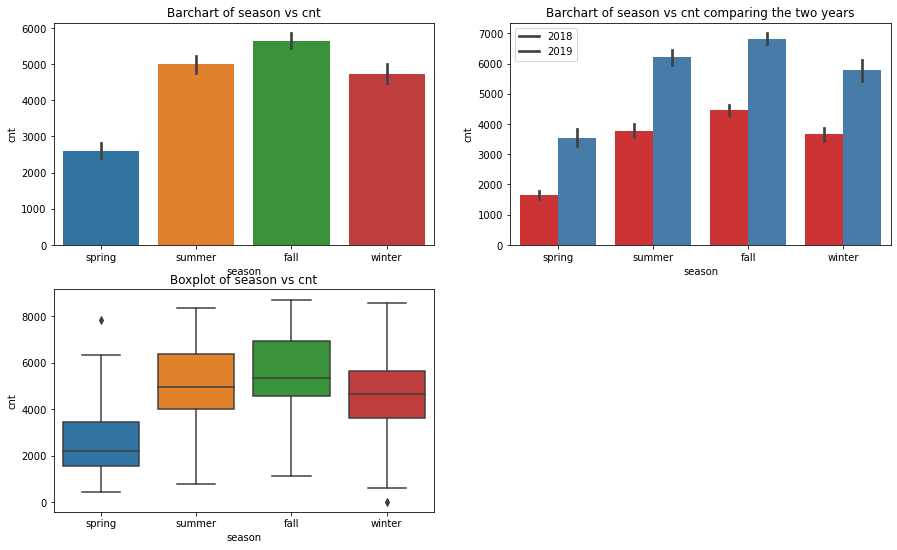

-----------------------------------------------------------------------------------------------------------------------------
year vs cnt


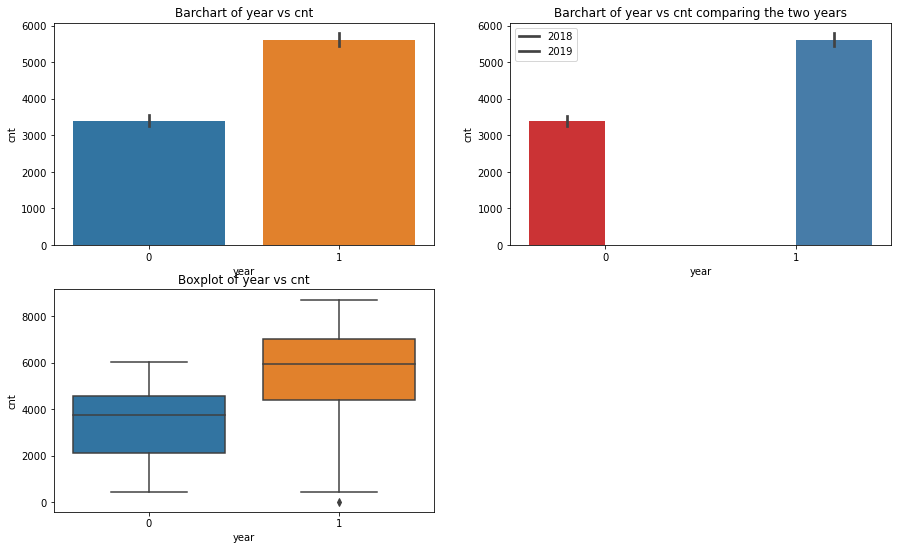

-----------------------------------------------------------------------------------------------------------------------------
month vs cnt


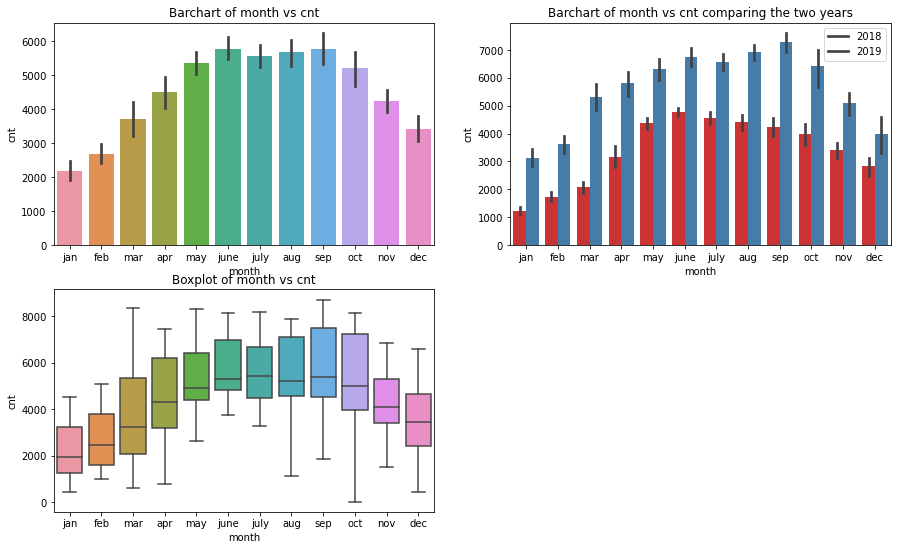

-----------------------------------------------------------------------------------------------------------------------------
holiday vs cnt


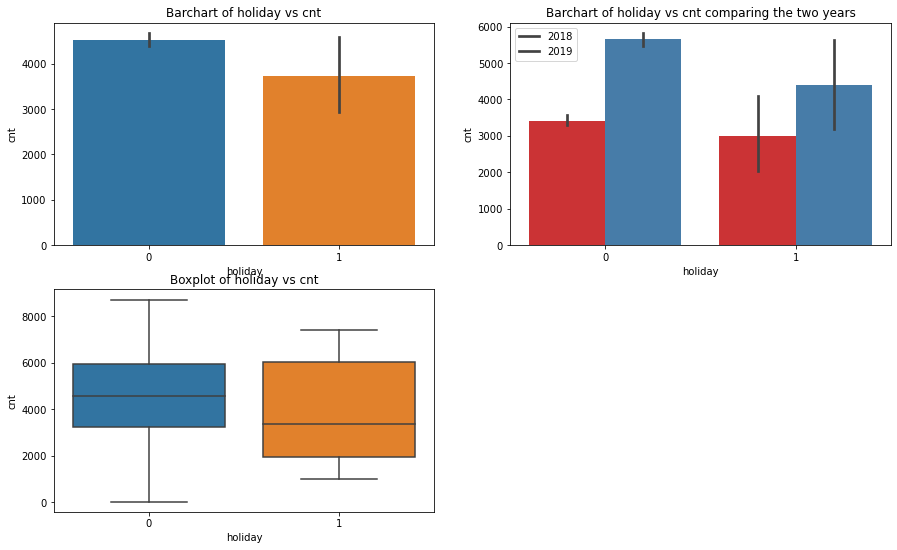

-----------------------------------------------------------------------------------------------------------------------------
weekday vs cnt


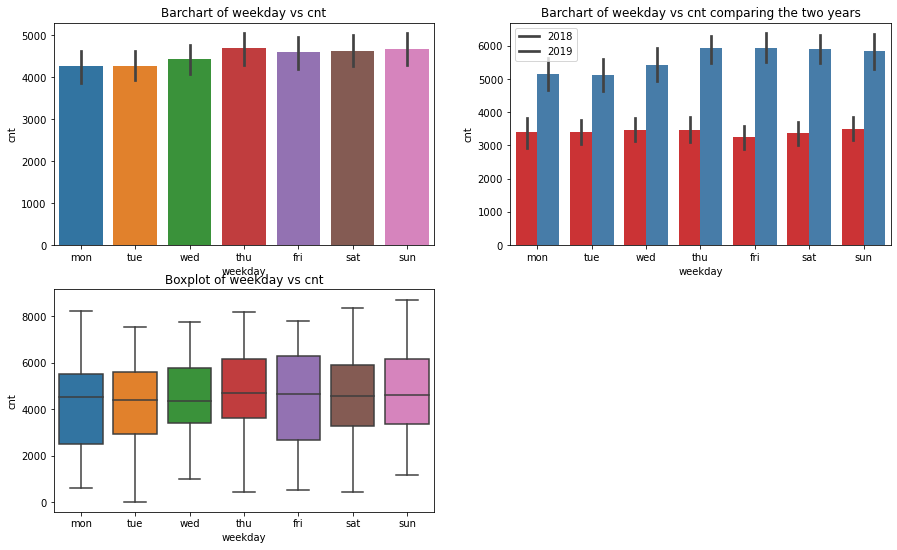

-----------------------------------------------------------------------------------------------------------------------------
workingday vs cnt


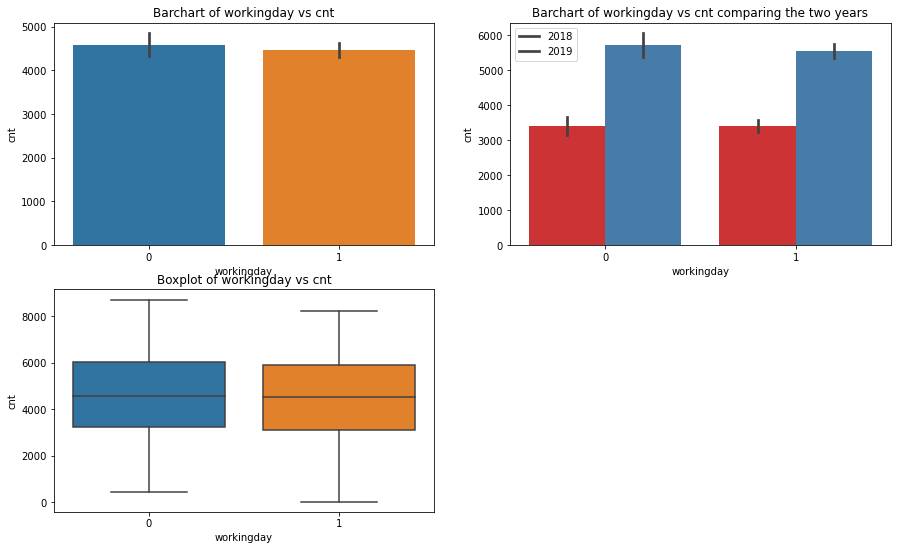

-----------------------------------------------------------------------------------------------------------------------------
weathersit vs cnt


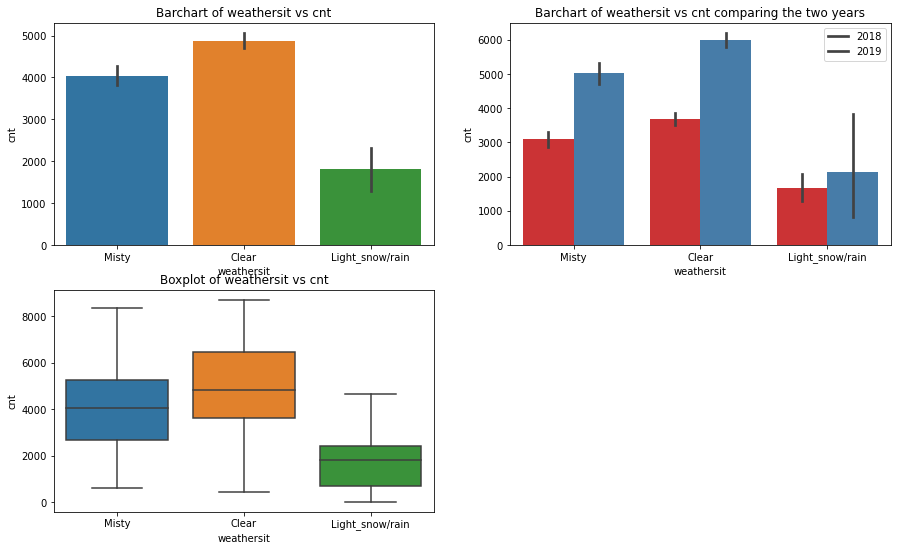

-----------------------------------------------------------------------------------------------------------------------------


In [17]:
# Applying the function to the mentioned categorical columns

cat_num=['season','year','month','holiday','weekday','workingday','weathersit']
for i in cat_num:
    plot_cat_columns(i)

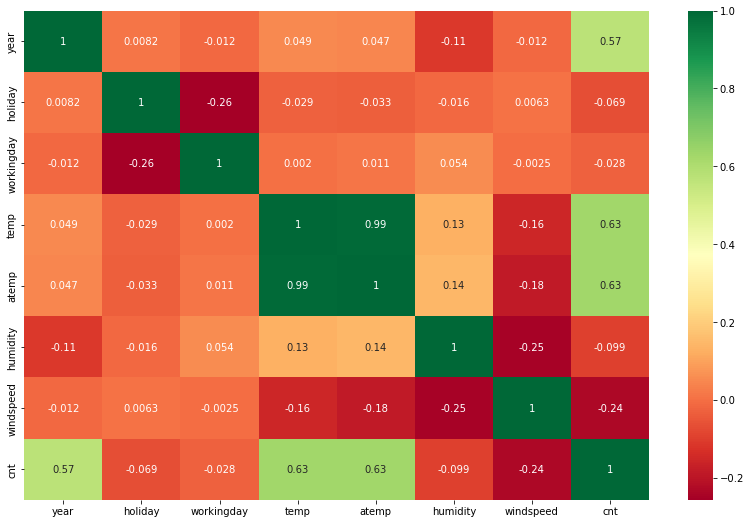

In [18]:
# Plotting a heat map to find corelation of the features with each other

plt.figure(figsize=[14,9])
sns.heatmap(bike.corr(),annot=True,cmap='RdYlGn')
plt.show()

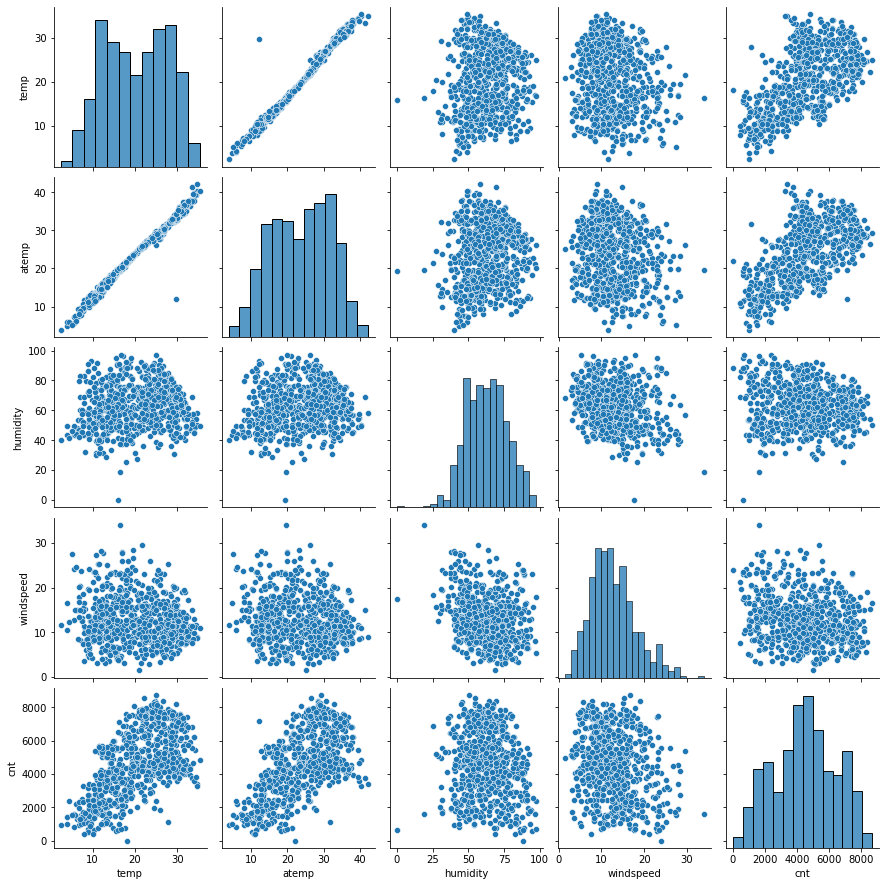

In [19]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

# Step 3: Data Preparation

In [20]:
# Preparing the dummy variable for categorical column (non binary columns)
dum_var=pd.get_dummies(bike[['season','weathersit','month','weekday']],drop_first=True)
dum_var.head()

,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Copying the database to other variable
bike1 = bike

In [22]:
# Checking the top 5 row
bike1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# Merging the dummy variables of the categorical columns with bike data frame and dropping the repeated columns
bike1 = pd.concat([bike1,dum_var],axis=1)
bike1.drop(['season','weathersit','month','weekday'],axis=1,inplace=True)
bike1.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Checking the datatypes of the different columns and checking if there are any null values
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   humidity                    730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  weathersit_Light_snow/rain  730 non-null    uint8  
 12  weathersit_Misty            730 non-null    uint8  
 13  month_aug                   730 non

In [25]:
# Checking the shape of the dataset
bike1.shape

(730, 30)

# Step 4: Splitting the Data into Training and Testing Sets / Rescaling

In [26]:
# Splitting the data into testing and training dataset
df_train,df_test=train_test_split(bike1,train_size=0.7,random_state=100)

In [27]:
# Checking the shape of the testing and training dataset 
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [28]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [29]:
# Using MinMaxScaling for numerical columns only leaving columns with values 1/0 as it is as it wont have any effect by min max scaling

scaling_col=['temp','atemp','humidity','windspeed','cnt']
df_train[scaling_col]=scaler.fit_transform(df_train[scaling_col])

In [30]:
# Checking if the MinMaxScaling for numerical columns worked

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [31]:
# Checking if the dataframe is scaled properly

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,0.345098,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,0.475867,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


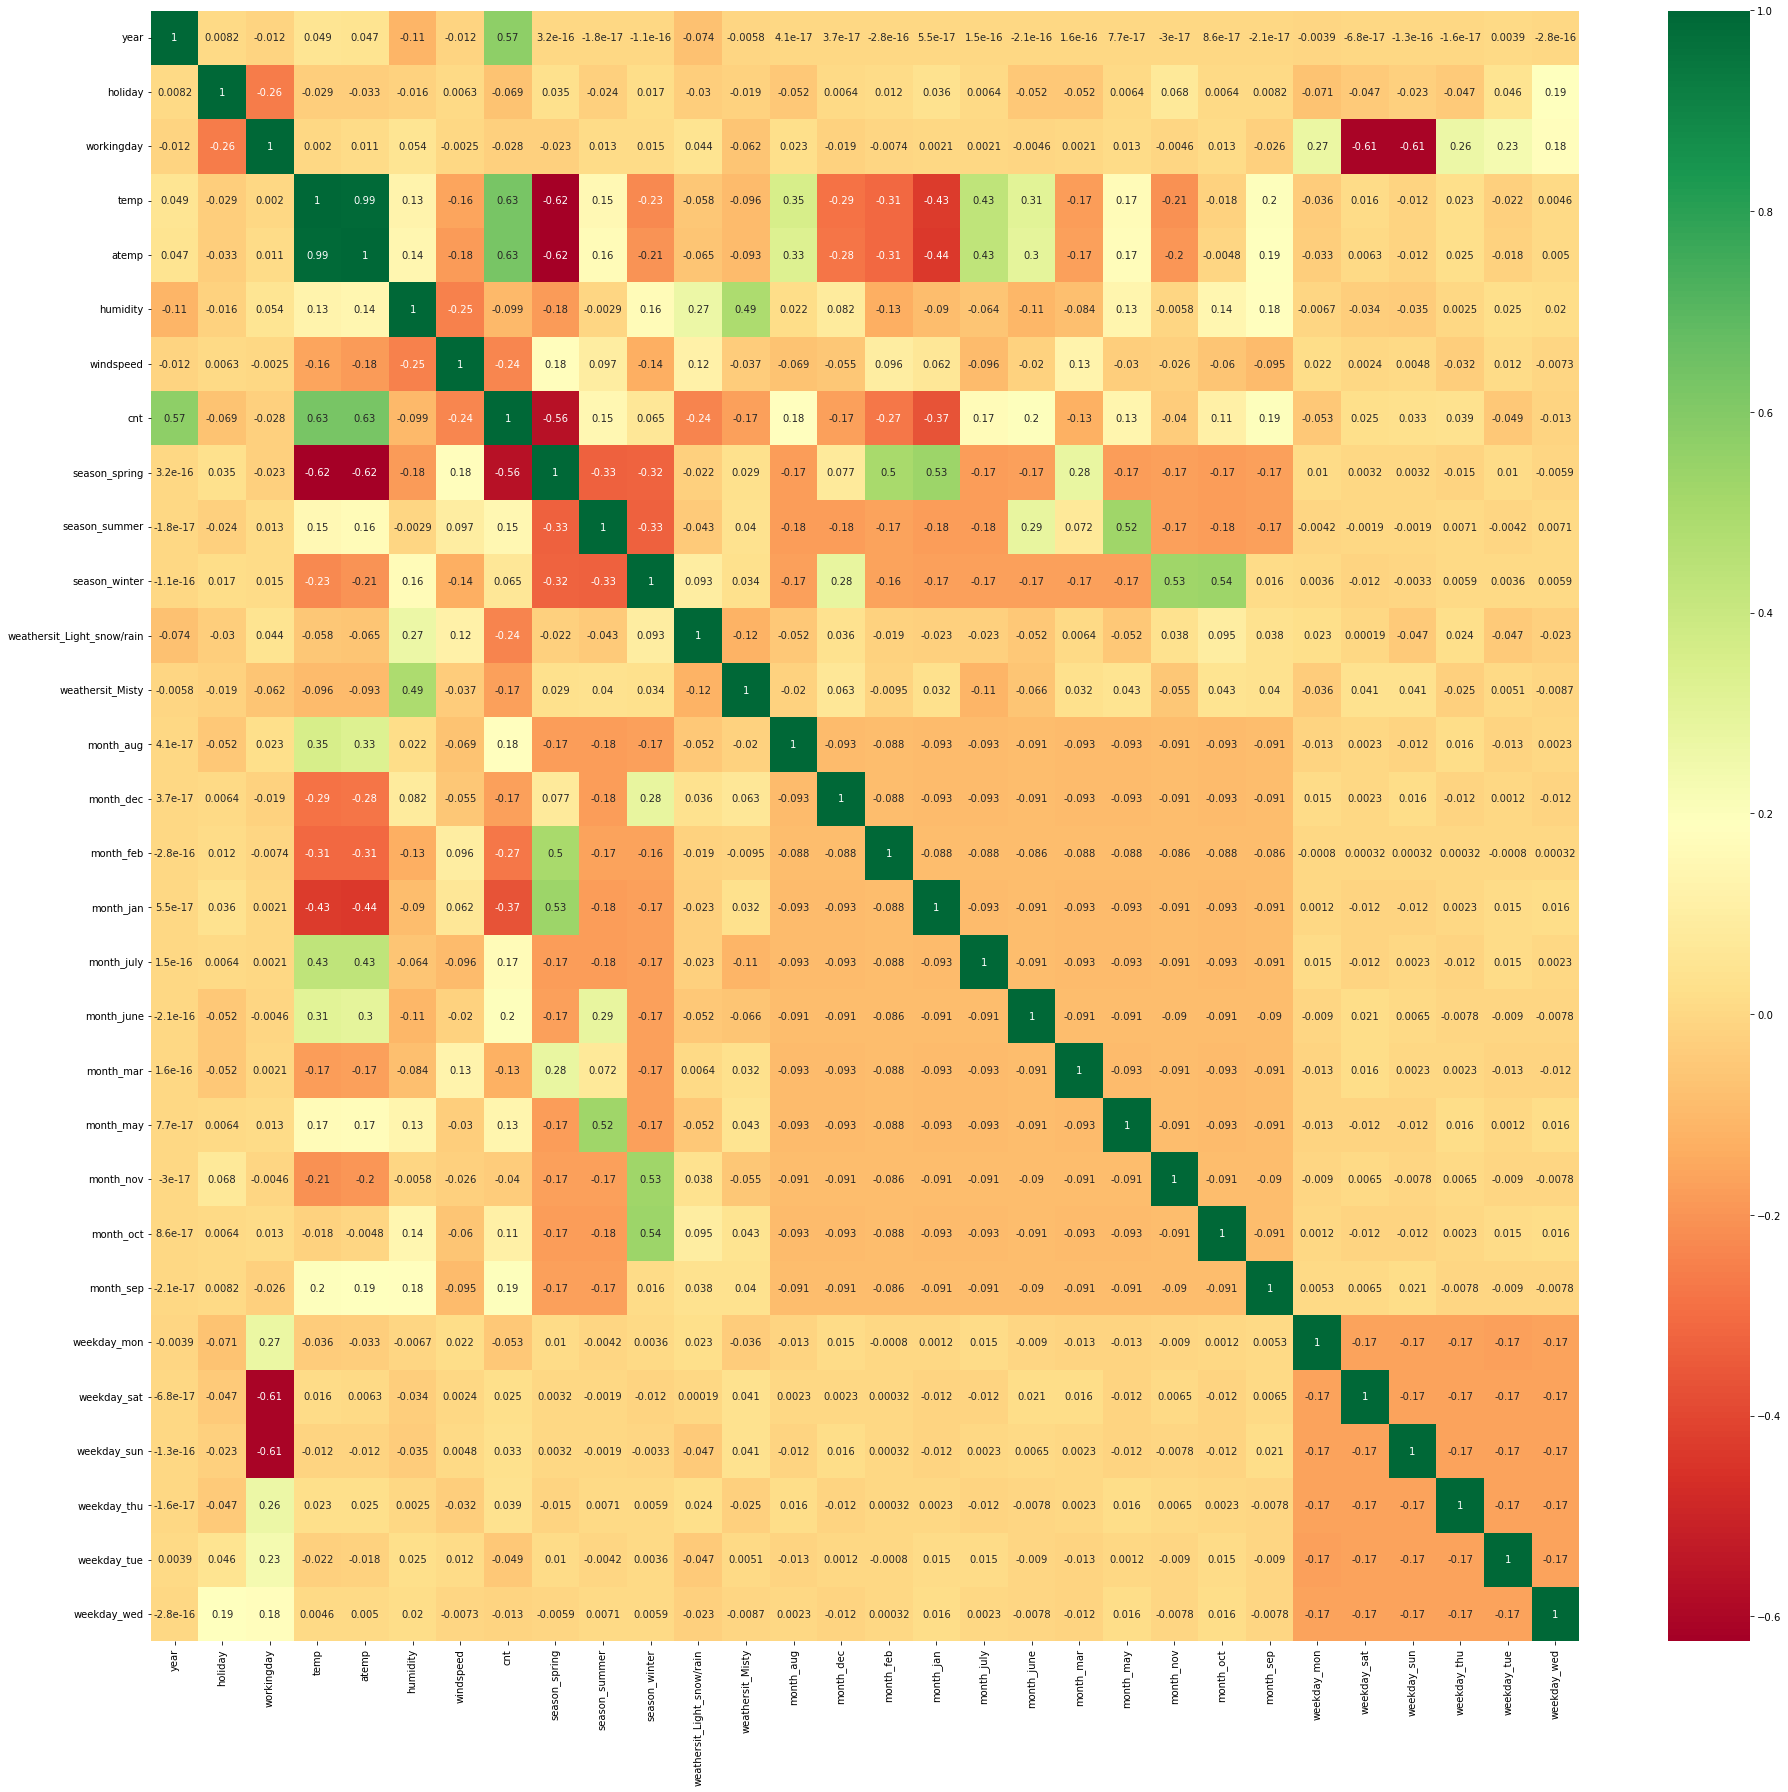

In [32]:
# Check the correlation coefficients by plotting heatmap to see which variables are highly correlated

plt.figure(figsize=[32,30])
sns.heatmap(bike1.corr(),annot=True,cmap='RdYlGn')
plt.show()

#### Dividing the dataframe into X and y for model building 

In [33]:
# Preparing X and y using training dataset
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Building the model

In [34]:
# Running RFE with the output number of the variable equal to 14

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 14)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light_snow/rain', True, 1),
 ('weathersit_Misty', True, 1),
 ('month_aug', False, 11),
 ('month_dec', False, 2),
 ('month_feb', False, 3),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 13),
 ('month_mar', False, 16),
 ('month_may', False, 10),
 ('month_nov', True, 1),
 ('month_oct', False, 14),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 12)]

In [36]:
# List of Top 14 predictors of cnt(target column)
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light_snow/rain',
       'weathersit_Misty', 'month_jan', 'month_july', 'month_nov',
       'month_sep'],
      dtype='object')

In [37]:
# List of features which are discarded

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_aug', 'month_dec', 'month_feb',
       'month_june', 'month_mar', 'month_may', 'month_oct', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_new = X_train[col]

In [39]:
# Adding constant column to X_train_rfe 

X_train_rfe = sm.add_constant(X_train_rfe)

#### Model - 1: 

In [40]:
# Building linear regression model

lm = sm.OLS(y_train,X_train_rfe).fit() 

In [41]:
# Checking the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 30 May 2023   Prob (F-statistic):          4.41e-189
Time:                        21:48:25   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [42]:
# Checking multicollinearity in the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,29.09
2,temp,16.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,3.78
6,season_summer,2.80
9,weathersit_Misty,2.29
0,year,2.09
10,month_jan,1.67
12,month_nov,1.60


In [43]:
# As month_nov shows high p-value hence we can drop it

X_train_new = X_train_new.drop(['month_nov'], axis = 1)
X_train_rfe = X_train_rfe.drop(['month_nov'], axis = 1)

#### Model - 2: 

In [44]:
# Building linear regression model and checking the summary

lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          7.59e-190
Time:                        21:48:25   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [45]:
# checking multicollinearity in the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,29.02
2,temp,16.71
4,windspeed,4.66
5,season_spring,4.34
7,season_winter,3.36
6,season_summer,2.79
9,weathersit_Misty,2.29
0,year,2.09
10,month_jan,1.67
11,month_july,1.59


In [46]:
# As humidity shows high VIF value hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)
X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)

#### Model - 3: 

In [47]:
# Building linear regression model and checking the summary

lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 30 May 2023   Prob (F-statistic):          8.14e-187
Time:                        21:48:25   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [48]:
# checking multicollinearity in the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,season_spring,2.75
5,season_summer,2.24
0,year,2.07
6,season_winter,1.78
9,month_jan,1.61
10,month_july,1.59
8,weathersit_Misty,1.56
11,month_sep,1.34


In [49]:
# As month_jan shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['month_jan'], axis = 1)
X_train_rfe = X_train_rfe.drop(['month_jan'], axis = 1)

#### Model - 4: 

In [50]:
# Building linear regression model and checking the summary

lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 30 May 2023   Prob (F-statistic):          5.06e-187
Time:                        21:48:26   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [51]:
# checking multicollinearity in the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.23
4,season_spring,2.08
0,year,2.07
6,season_winter,1.78
9,month_july,1.58
8,weathersit_Misty,1.55
10,month_sep,1.34
7,weathersit_Light_snow/rain,1.08


In [52]:
# As month_july shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['month_july'], axis = 1)
X_train_rfe = X_train_rfe.drop(['month_july'], axis = 1)

#### Model - 5: 

In [53]:
# Building linear regression model and checking the summary

lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.47e-186
Time:                        21:48:26   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [54]:
# checking multicollinearity in the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
8,weathersit_Misty,1.55
9,month_sep,1.23
7,weathersit_Light_snow/rain,1.08
1,holiday,1.04


### We can cosider the above model, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
### F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant


In [55]:
# Checking the parameters in the best fit model

lm.params

const                         0.190855
year                          0.234132
holiday                      -0.096316
temp                          0.477737
windspeed                    -0.148098
season_spring                -0.055406
season_summer                 0.062076
season_winter                 0.094476
weathersit_Light_snow/rain   -0.285031
weathersit_Misty             -0.078741
month_sep                     0.090998
dtype: float64

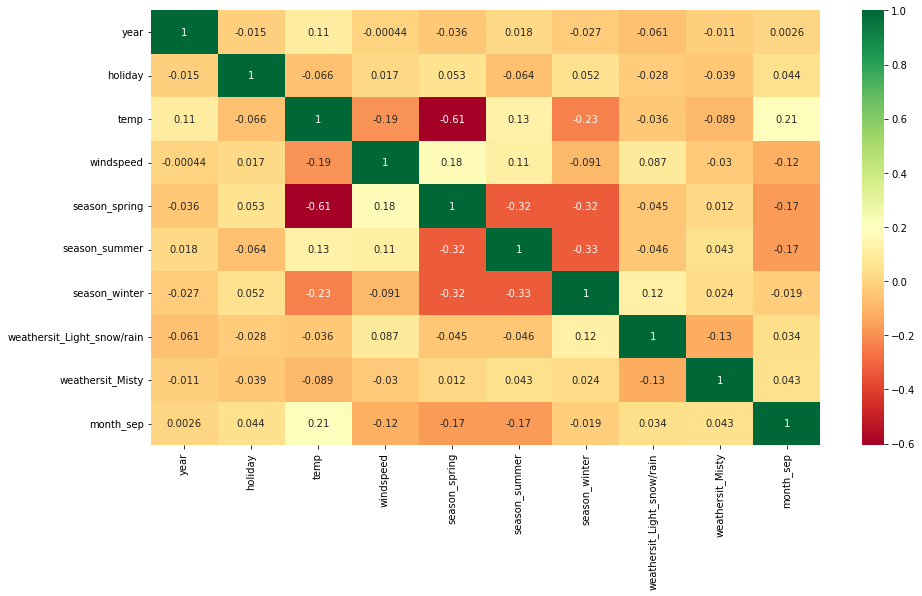

In [56]:
# Checking the coefficient correation of all the features with eachothr that are present in the final model

plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

# Step 6 : Residual analysis

In [57]:
# Getting predicted values from the training set

y_train_pred = lm.predict(X_train_rfe)

In [58]:
# calculating residual
res=y_train - y_train_pred

Text(0.5, 0, 'Errors')

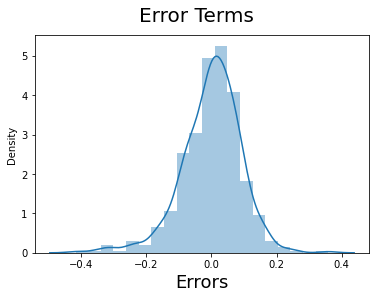

In [59]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

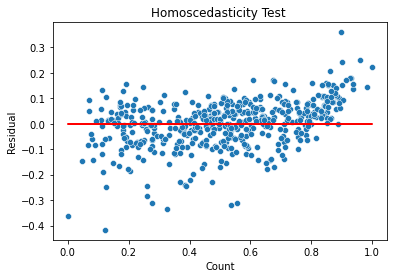

In [60]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable.
# error terms are also indipendent as there is no visible pattern.
sns.scatterplot(y_train,(res))
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('Homoscedasticity Test ')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

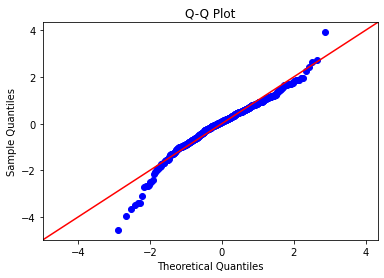

In [61]:
# making Q-Q plot to confirm that error terms are normally distributed 
sm.qqplot(( y_train - y_train_pred), fit=True, line='45')
plt.title('Q-Q Plot')
plt.show()

# Step 7: Making Predictions Using the Final Model

In [62]:
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [63]:
# scaling the test_df

df_test[scaling_col]=scaler.transform(df_test[scaling_col])

In [64]:
# checking if the scaling is done correctly

df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,0.318182,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,0.466833,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Getting X and y for the test dataset

y_test=df_test.pop('cnt')
X_test=df_test

In [66]:
# Checking if the code worked correctly

print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [67]:
# Keeping only those variables/features which are present in the model

X_test=X_test[X_train_new.columns]

In [68]:
# Adding constant column

X_test_sm=sm.add_constant(X_test)

In [69]:
X_test_sm.head()

,const,year,holiday,temp,windspeed,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,month_sep
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0


In [70]:
# Predicting the cnt through test data set

y_test_pred=lm.predict(X_test_sm)

# Step 8: Model Evaluation

In [71]:
# Calculating R-squared value for test dataset using the model

r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.8038

Text(0, 0.5, 'y_pred')

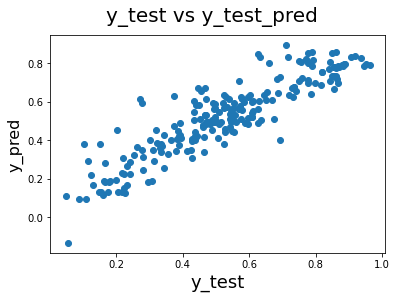

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [73]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


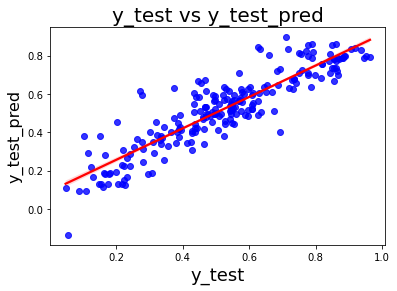

In [74]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

In [75]:
print(round(lm.params,4))

const                         0.1909
year                          0.2341
holiday                      -0.0963
temp                          0.4777
windspeed                    -0.1481
season_spring                -0.0554
season_summer                 0.0621
season_winter                 0.0945
weathersit_Light_snow/rain   -0.2850
weathersit_Misty             -0.0787
month_sep                     0.0910
dtype: float64


### cnt = 0.1909+0.2341*year-0.0963*holiday+0.4777*temp-0.1481*windspeed-0.0554*season_spring+0.0621*season_summer+0.0945*season_winter-0.2850*weathersit_Light_snow/rain-0.0787*weathersit_Misty+0.0910*month_sep

# R^2 and Adjusted R^2 values of Train and Test dataset

- Train dataset R^2          : 0.833
- Train dataset Adjusted R^2 : 0.829    
- Test dataset R^2           : 0.8038
- Test dataset Adjusted R^2  : 0.7944